In [4]:
##########################################################複製區塊
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys
import meep as mp
import numpy as np
import random
import multiprocessing as multi
#setup some constants and parameters
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=30000
frq_min = 0
frq_max = 100/2/np.pi
nfreq = 1000
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
#define square root of Dn function
def Dnsqt(wla,T):
    return np.sqrt(6*hdk**2*wla/(np.exp(hdk*wla/T)-1)/T**2/np.pi)

#generate an array of the square root of Dn function
Dsqt = []
for n in range(1,M):
    Dsqt.append(Dnsqt(2*np.pi*n/tsim,T))

#define how many times to run to average the results
Ncomp= 5
nfreq =  1000
#define the starting sum of the result
Efsum = np.zeros(nfreq)
Ens = np.zeros(2**22)
resolution = 1000
dA = 0.5
dB = 0.02
dpml = 1.0
sz = dpml*2+dA*2+dB
cell = mp.Vector3(0, 0, sz)
pml_layers = [mp.PML(dpml)]



for i in range(Ncomp):
    
    def random_En(t):
        #generate random numbers
        M0 = np.random.normal(0,1)
        Mlp = np.random.normal(0,1,M-1)
        Nlp = np.random.normal(0,1,M-1)
        MM = np.random.normal(0,1)
    
        #generate the array of the fourier transform of E field, we generate l=0 and l=-M separately. 
        #for l=1 to M-1 and l=-1 to -(M-1) are conjutated to each other. 
        #we contruct the whole array by gluing them together by the order from l=0 -> l=M-1 -> l=-M -> l=-(m-1) -> l=-1
        Ef0 = np.array([M0*np.sqrt(6*hdk/np.pi/T)])
        Eflp = np.multiply((Mlp + 1j*Nlp), Dsqt)
        Eflm = np.flip(np.conjugate(Eflp))
        EfM = np.array([MM*Dnsqt(2*np.pi*M/tsim,T)])
        Ef = np.hstack((Ef0,Eflp,EfM,Eflm))
    
        #we normalize Ef and compute its inverse fast fourier transform
        Efn = deltap*T/np.sqrt(tsim)*Ef
        En = np.fft.ifft(Efn)*M
        return En
    En0 = random_En(1)
    En1 = random_En(1)
    En2 = random_En(1)
    En3 = random_En(1)
    En4 = random_En(1)
    En5 = random_En(1)
    En6 = random_En(1)
    En7 = random_En(1)
    En8 = random_En(1)
    En9 = random_En(1)
    En10 = random_En(1)
    En11 = random_En(1)
    #generate some feedback to check the progress of the loop
    x = i/Ncomp*100
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('a'*int(x), int(x)))
    sys.stdout.flush()
    sleep(0.0001)
    
    
    def source0(t):
        f = int(t*2000)
        return En0[f]
    def source1(t):
        f = int(t*2000)
        return En1[f]
    def source2(t):
        f = int(t*2000)
        return En2[f]
    def source3(t):
        f = int(t*2000)
        return En3[f]
    def source4(t):
        f = int(t*2000)
        return En4[f]
    def source5(t):
        f = int(t*2000)
        return En5[f]
    def source6(t):
        f = int(t*2000)
        return En6[f]
    def source7(t):
        f = int(t*2000)
        return En7[f]
    def source8(t):
        f = int(t*2000)
        return En8[f]
    def source9(t):
        f = int(t*2000)
        return En9[f]
    def source10(t):
        f = int(t*2000)
        return En10[f]
    def source11(t):
        f = int(t*2000)
        return En11[f]


    sources = [mp.Source(mp.CustomSource(src_func=source0),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz+dpml),
                     ),
              mp.Source(mp.CustomSource(src_func=source1),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml),
                     ),
              mp.Source(mp.CustomSource(src_func=source2),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz-dpml+0.1),
                     ),
              mp.Source(mp.CustomSource(src_func=source3),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml-0.1),
                     ),
              mp.Source(mp.CustomSource(src_func=source4),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz-dpml+0.2),
                     ),
              mp.Source(mp.CustomSource(src_func=source5),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml-0.2),
                     ),
              mp.Source(mp.CustomSource(src_func=source6),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz+dpml),
                     ),
              mp.Source(mp.CustomSource(src_func=source7),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml),
                     ),
              mp.Source(mp.CustomSource(src_func=source8),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz-dpml+0.1),
                     ),
              mp.Source(mp.CustomSource(src_func=source9),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml-0.1),
                     ),
              mp.Source(mp.CustomSource(src_func=source10),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz-dpml+0.2),
                     ),
              mp.Source(mp.CustomSource(src_func=source11),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,0.5*sz-dpml-0.2),
                     )]
    
    def BlockAB(N, center):
        geometry = []
        for i in range(N):
            geometry = np.append(geometry, mp.Block(mp.Vector3(0,0,dA),
                     center=mp.Vector3(0,0,0-dA/2-dB/2),
                     material=mp.Medium(epsilon=1)))
            geometry = np.append(geometry, mp.Block(mp.Vector3(0,0,dB),
                     center=mp.Vector3(0,0,0),
                     material=mp.Medium(epsilon=36)))
            geometry = np.append(geometry, mp.Block(mp.Vector3(0,0,dA),
                     center=mp.Vector3(0,0,dB/2+dA/2),
                     material=mp.Medium(epsilon=1)))
        geometry = geometry.tolist()
        return geometry
    sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,   
                    dimensions = 1,
                    Courant = 1,
                    resolution=resolution,
                    geometry=BlockAB(1,0))
    
    

    # transmitted flux
    tran_fr = mp.FluxRegion(center=mp.Vector3(0,0,random.uniform(-0.01,0.01)))
    tran = sim.add_energy(fcen, df, nfreq, tran_fr)
    
    
    sim.run(until=2090)

    tran_flux = mp.get_magnetic_energy(tran)
    Ts = []
    for i in range(nfreq):
        Ts = np.append(Ts,tran_flux[i])    
    Efsum += Ts
    
    

#average the final result
Efavg = Efsum/Ncomp

#save data to some file or reload file to write more data on it



[                    ] 0%-----------
Initializing structure...
time for choose_chunkdivision = 0.000491142 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 3.02 with resolution 1000
     block, center = (0,0,-0.26)
          size (0,0,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0,0,0.02)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (36,36,36)
     block, center = (0,0,0.26)
          size (0,0,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.00652695 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 20.955000000000002/2090.0 = 1.0% done in 4.0s, 395.0s to go
on time step 20993 (time=20.993), 0.000190542 s/step
Meep progress: 42.132/2090.0 = 2.0% done in 8.0s, 388.9s to go
on time step 42203 (time=42.203), 0.000188593 s/step
Meep progress: 63.256/2090.0 = 3.0% done in 12.0s, 384.5s to go
on time step 63335 (time=63.335), 0.00018929 s/step
Meep progress: 84.33200000000001/2090.0 = 4.0% done in 16.0s, 380.5s to go
on time step 84414 (time=84.414), 0.000189769 s/step
Meep progress: 105.60600000000001/2090.0 = 5.1% done in 20.0s, 375.8s to go
on time step 105693 (time=105.693), 0.000187984 s/step
Meep progress: 126.882/2090.0 = 6.1% done in 24.0s, 371.3s to go
on time step 126978 (time=126.978), 0.000187927 s/step
Meep progress: 148.113/2090.0 = 7.1% done in 28.0s, 367.1s to go
on time step 148214 (time=148.214), 0.000188365 s/step
Meep progress: 169.453/2090.0 = 8.1% done in 32.0s, 362.7s to go
on time step 169558 (time=169.558), 0.000187408 s/step
Meep progress: 190.76

FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 21.288/2090.0 = 1.0% done in 4.0s, 388.7s to go
on time step 21296 (time=21.296), 0.000187834 s/step
Meep progress: 42.593/2090.0 = 2.0% done in 8.0s, 384.6s to go
on time step 42604 (time=42.604), 0.00018773 s/step
Meep progress: 63.907000000000004/2090.0 = 3.1% done in 12.0s, 380.5s to go
on time step 63920 (time=63.92), 0.000187657 s/step
Meep progress: 85.162/2090.0 = 4.1% done in 16.0s, 376.7s to go
on time step 85177 (time=85.177), 0.000188177 s/step
Meep progress: 106.505/2090.0 = 5.1% done in 20.0s, 372.5s to go
on time step 106523 (time=106.523), 0.000187392 s/step
Meep progress: 127.79/2090.0 = 6.1% done in 24.0s, 368.5s to go
on time step 127808 (time=127.808), 0.00018793 s/step
Meep progress: 149.052/2090.0 = 7.1% done in 28.0s, 364.6s to go
on time step 149074 (time=149.074), 0.000188097 s/step
Meep progress: 170.487/2090.0 = 8.2% done in 32.0s, 360.3s to go
on time step 170511 (time=170.511), 0.000186602 s/step
Meep progress: 191.889/2090.0 = 9.2% done in 3

FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 21.17/2090.0 = 1.0% done in 4.0s, 390.9s to go
on time step 21177 (time=21.177), 0.000188885 s/step
Meep progress: 42.422000000000004/2090.0 = 2.0% done in 8.0s, 386.1s to go
on time step 42432 (time=42.432), 0.000188193 s/step
Meep progress: 63.734/2090.0 = 3.0% done in 12.0s, 381.5s to go
on time step 63746 (time=63.746), 0.000187677 s/step
Meep progress: 84.051/2090.0 = 4.0% done in 16.0s, 381.9s to go
on time step 84064 (time=84.064), 0.000196872 s/step
Meep progress: 104.036/2090.0 = 5.0% done in 20.0s, 381.8s to go
on time step 104052 (time=104.052), 0.000200124 s/step
Meep progress: 124.303/2090.0 = 5.9% done in 24.0s, 379.5s to go
on time step 124322 (time=124.322), 0.000197344 s/step
Meep progress: 145.56300000000002/2090.0 = 7.0% done in 28.0s, 374.0s to go
on time step 145585 (time=145.585), 0.000188128 s/step
Meep progress: 166.948/2090.0 = 8.0% done in 32.0s, 368.6s to go
on time step 166973 (time=166.973), 0.000187029 s/step
Meep progress: 188.311/2090.0 = 

FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 20.959/2090.0 = 1.0% done in 4.0s, 394.9s to go
on time step 20966 (time=20.966), 0.000190786 s/step
Meep progress: 41.135/2090.0 = 2.0% done in 8.0s, 398.5s to go
on time step 41145 (time=41.145), 0.00019823 s/step
Meep progress: 61.24/2090.0 = 2.9% done in 12.0s, 397.5s to go
on time step 61253 (time=61.253), 0.00019893 s/step
Meep progress: 80.601/2090.0 = 3.9% done in 16.0s, 398.9s to go
on time step 80615 (time=80.615), 0.000206596 s/step
Meep progress: 99.667/2090.0 = 4.8% done in 20.0s, 399.4s to go
on time step 99683 (time=99.683), 0.00020978 s/step
Meep progress: 120.602/2090.0 = 5.8% done in 24.0s, 391.9s to go
on time step 120622 (time=120.622), 0.00019104 s/step
Meep progress: 141.906/2090.0 = 6.8% done in 28.0s, 384.4s to go
on time step 141930 (time=141.93), 0.000187726 s/step
Meep progress: 163.342/2090.0 = 7.8% done in 32.0s, 377.5s to go
on time step 163368 (time=163.368), 0.000186588 s/step
Meep progress: 184.668/2090.0 = 8.8% done in 36.0s, 371.4s to g

FloatProgress(value=0.0, description='0% done ', max=2090.0)

Meep progress: 21.026/2090.0 = 1.0% done in 4.0s, 393.6s to go
on time step 21033 (time=21.033), 0.00019018 s/step
Meep progress: 42.334/2090.0 = 2.0% done in 8.0s, 387.0s to go
on time step 42344 (time=42.344), 0.000187703 s/step
Meep progress: 63.662/2090.0 = 3.0% done in 12.0s, 382.0s to go
on time step 63674 (time=63.674), 0.000187536 s/step
Meep progress: 85.044/2090.0 = 4.1% done in 16.0s, 377.2s to go
on time step 85059 (time=85.059), 0.000187051 s/step
Meep progress: 106.388/2090.0 = 5.1% done in 20.0s, 372.9s to go
on time step 106405 (time=106.405), 0.000187394 s/step
Meep progress: 127.63000000000001/2090.0 = 6.1% done in 24.0s, 369.0s to go
on time step 127647 (time=127.647), 0.000188311 s/step
Meep progress: 148.995/2090.0 = 7.1% done in 28.0s, 364.8s to go
on time step 149017 (time=149.017), 0.000187184 s/step
Meep progress: 170.423/2090.0 = 8.2% done in 32.0s, 360.4s to go
on time step 170447 (time=170.447), 0.00018666 s/step
Meep progress: 191.818/2090.0 = 9.2% done in 

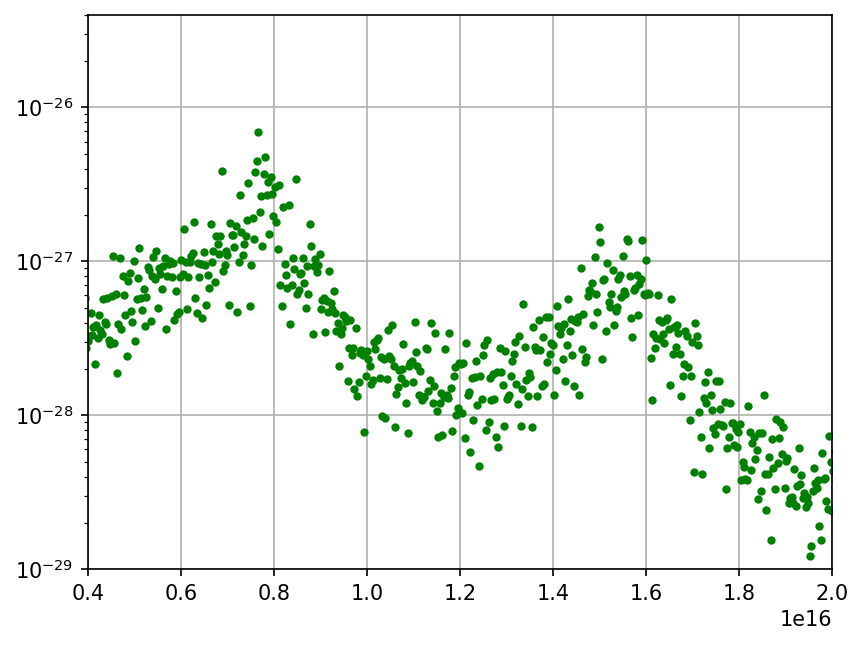

In [7]:
plt.figure(dpi=150)
freqs = np.linspace(0,30e15,1000)
plt.plot(freqs,Efavg*tsim*eps0*4*np.pi*3/2**21/12,'g''.')
plt.xlim(4e15,20e15)
plt.yscale("log")
plt.ylim(0.1e-28,400e-28)
plt.grid()
plt.savefig('12_source_test_detector_photonic_crystal_30000.png')
plt.show()

#np.savez("test_custom_source_photonic_crystal_30000.npz", Efavg_30000 = Efavg)

In [3]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
            
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('test_detector_photonic_crystal_30000.png','trans_test_detector_photonic_crystal_30000.png')